### 이번 실습에서는 다음 내용들을 배웁니다.


- seaborn과 앞에서 합친 데이터를 가지고, 주가 데이터의 변화 정도를 시각화해봅니다.


- pandas로 전처리하는 방법과 seaborn의 사용법을 익혀봅니다.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('./data/all_oilbank.xlsx')
df

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,강원특별자치도,강릉농협주유소,강원 강릉시 유산로 19 (유산동),NH-OIL,033-648-9305,N,-,1698,1555,1300
1,강원특별자치도,쌍용장원주유소,강원 영월군 한반도면 강원남로 153,S-OIL,033-372-5145,Y,-,1715,1535,-
2,강원특별자치도,영월랜드주유소,강원 영월군 한반도면 강원남로 267,GS칼텍스,033-372-8981,Y,-,1715,1535,-
3,강원특별자치도,대일주유소,강원 영월군 북면 원동재로 513,GS칼텍스,033-372-3343,N,-,1715,1530,1250
4,강원특별자치도,대륙주유소,강원 영월군 한반도면 강원남로 140,GS칼텍스,033-372-2998,N,-,1689,1499,1300
...,...,...,...,...,...,...,...,...,...,...
12180,충청북도,하늘주유소,충북 음성군 금왕읍 음성로 1076,S-OIL,043-883-5686,N,-,1789,1619,1400
12181,충청북도,원남주유소,충북 음성군 원남면 충청대로 1139,GS칼텍스,043-872-6684,Y,-,1789,1609,1300
12182,충청북도,초원주유소,충북 음성군 금왕읍 대금로 1452,GS칼텍스,043-883-4567,Y,-,1790,1625,1400
12183,충청북도,삼용주유소,충북 음성군 삼성면 금일로 1065,S-OIL,043-877-3872,N,-,1749,1562,-


TypeError: 'value' must be an instance of str or bytes, not a int

C:\Users\Chase\pylab\fastcampus\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Chase\pylab\fastcampus\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Chase\pylab\fastcampus\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Chase\pylab\fastcampus\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Chase\pylab\fastcampus\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Chase\pylab\fastcampus\Lib\site-packages\IPython\core\eve

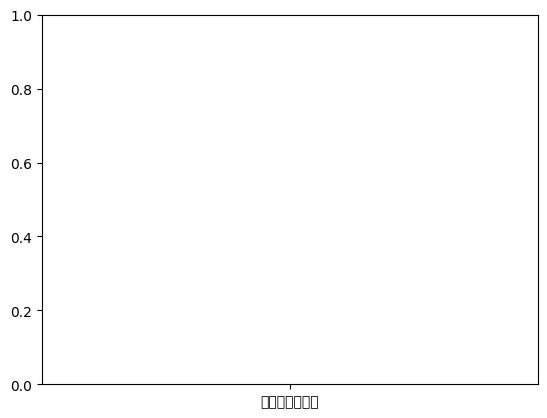

In [13]:
# sns.lineplot(data=penguins, x="body_mass_g",
#              y="flipper_length_mm", 
#              hue="species",
#              errorbar=('ci', False))

In [15]:
### EDA (Exploratory Data Analysis
# 지역별 분석
df['지역'].value_counts()

지역
경기도        2897
경상북도       1324
경상남도       1170
충청남도       1121
전북특별자치도     955
충청북도        890
전라남도        838
강원특별자치도     619
서울특별시       430
부산광역시       349
대구광역시       346
인천광역시       312
광주광역시       239
울산광역시       224
대전광역시       214
제주특별자치도     192
세종특별자치시      65
Name: count, dtype: int64

In [36]:
kg_oil = df.loc[df['지역'] == '경기도',['고급휘발유', '휘발유', '경유', '실내등유']]
kg_oil.replace('-', 0, inplace=True)

In [39]:
kg_oil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897 entries, 619 to 3515
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고급휘발유   2897 non-null   object
 1   휘발유     2897 non-null   object
 2   경유      2897 non-null   object
 3   실내등유    2897 non-null   object
dtypes: object(4)
memory usage: 113.2+ KB


In [42]:
for i in kg_oil.columns:
    kg_oil[i] = kg_oil[i].astype('int')

In [43]:
kg_oil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897 entries, 619 to 3515
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   고급휘발유   2897 non-null   int64
 1   휘발유     2897 non-null   int64
 2   경유      2897 non-null   int64
 3   실내등유    2897 non-null   int64
dtypes: int64(4)
memory usage: 113.2 KB


In [61]:
kg_oil_sum = kg_oil.mean().reset_index()
kg_oil_sum.columes = ['kind', 'AVG']
kg_oil_sum

C:\Users\Chase\AppData\Local\Temp\ipykernel_26032\2164763599.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  kg_oil_sum.columes = ['kind', 'AVG']


,index,0
0,고급휘발유,472.416638
1,휘발유,1712.717984
2,경유,1553.188126
3,실내등유,585.496721


<Axes: xlabel='index', ylabel='0'>

C:\Users\Chase\pylab\fastcampus\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Chase\pylab\fastcampus\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Chase\pylab\fastcampus\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 55064 (\N{HANGUL SYLLABLE HWI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Chase\pylab\fastcampus\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Chase\pylab\fastcampus\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Chase\pylab\fastcampus\Lib\site-packages\IPython\core\events.p

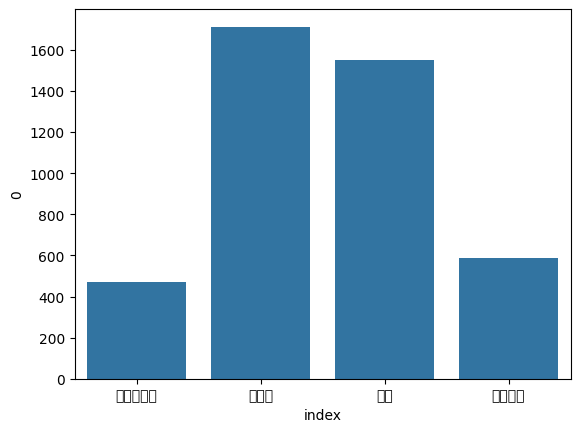

In [63]:
sns.barplot(data=kg_oil_sum,
            x='index',
            y=0)

In [64]:
kg_oil

,고급휘발유,휘발유,경유,실내등유
619,1989,1789,1585,0
620,0,1789,1629,1500
621,0,1785,1595,0
622,1948,1778,1598,1528
623,0,1775,1595,0
...,...,...,...,...
3511,0,1758,1585,0
3512,0,1712,1542,0
3513,1974,1774,1585,0
3514,1978,1801,1598,1530


In [65]:
kg_oil.columns = ['highend', 'gasoline', 'disel', 'kerosene']

In [66]:
kg_oil

,highend,gasoline,disel,kerosene
619,1989,1789,1585,0
620,0,1789,1629,1500
621,0,1785,1595,0
622,1948,1778,1598,1528
623,0,1775,1595,0
...,...,...,...,...
3511,0,1758,1585,0
3512,0,1712,1542,0
3513,1974,1774,1585,0
3514,1978,1801,1598,1530


<Axes: xlabel='gasoline', ylabel='highend'>

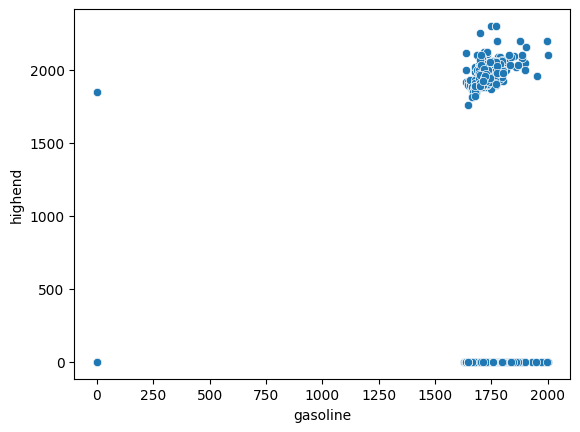

In [73]:
# sns.histplot(data=kg_oil,
#              x='gasoline',
#              bins=30)
sns.scatterplot(data=kg_oil,
             x='gasoline',
             y='highend')